<img src="header.png" width="1000">

Bibliotheken einbinden (bei Bedarf darfst du gerne weitere benutzen):

In [47]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
import seaborn as sns

Versionen:

In [48]:
from sys import version
version

'3.10.7 (tags/v3.10.7:6cc6b13, Sep  5 2022, 14:08:36) [MSC v.1933 64 bit (AMD64)]'

In [49]:
pd.__version__

'2.2.0'

In [50]:
np.__version__

'1.23.3'

## Aufgabe 1 (31 Punkte)

Du hast dir einen Job als Data Scientist beim Hotellerie-Verband geschnappt und sollst als erstes für eine Publikation unter anderem eine aktualisierte Statistik der Anzahl der Hotelübernachtungen ("Logiernächte") pro Kanton erstellen. Damit soll den Hoteliers die Möglichkeit geboten werden, Trends zu erkennen und entsprechend darauf zu reagieren. 


Die kumulierte Anzahl der Logiernächte pro Jahr und Kanton, aufgeschlüsselt nach Herkunftsland, findest du in der beigefügten Datei `Hotellerie.xlsx`. In der ersten Teilaufgabe analysierst du nur die Daten für das Jahr 2023, ab Teilaufgabe b) möchtest du deine Analyse dann auf alle Jahre seit 2005 ausweiten.

### a) (12 Punkte)

Lies die Logiernächte für das Jahr 2023 aus der Excel-Datei ein und bringe sie in ein Data Frame der folgenden Form:

<img src="hotellerie1.png" width="1000">

Die Namen der einzelnen Kantone darfst du dabei nicht manuell oder mit copy&paste zuweisen, sondern sollst sie direkt mit Python/R aus der Excel-Datei lesen (das Einlesen der Spaltennamen kann auch nachgelagert in einem zweiten Schritt nach dem Einlesen der Daten erfolgen). Ebenfalls sollst du die Logiernächte nicht über manuelle Eingabe der Spaltennamen extrahieren, sondern über eine geeignete Regel in Python/R (siehe Hinweise).

**Hinweise:**

* Extrahiere nur die Logiernächte, der Rest (Ankünfte und Dauer) interessiert uns für diese Auswertung nicht. Die Extraktion der Logiernächte (und auch der Kantonsnamen) kann z.B. effizient mit einer Zahlenreihe mit `np.arange()` in Python oder `seq()` in R erfolgen.
* Stelle sicher, dass die Namen der Kantone getrimmt sind (d.h. keine führenden oder nachfolgenden Whitespaces mehr enthalten).
* Das Datenset enthält 27 statt 26 Kantone, warum sollte dir schnell klar sein.
* Prüfe am Schluss auf fehlende Werte - dein Data Frame sollte davon keine mehr enthalten.

In [51]:
# DEIN CODE
df = pd.read_excel(
    "Hotellerie.xlsx", header=None, skiprows=8, nrows=72,  
    usecols="B:CD", sheet_name='2010'
)

df = df[df.columns[1::3]]

kantone = pd.read_excel(
    "Hotellerie.xlsx", header=None, skiprows=2, nrows=1,  
    usecols="B:CD", sheet_name='2010', na_values=False
)
kantone = kantone.dropna(axis=1)

kantone = kantone.apply(lambda x: x.str.strip())

df.columns = kantone.stack()


herkunft = pd.read_excel(
    "Hotellerie.xlsx", header=None, skiprows=8, nrows=72,  
    usecols="A", sheet_name='2010', na_values=False
)
df['Herkunft'] = herkunft[0]
df

,Aargau,Appenzell-Ausserrhoden,Appenzell-Innerrhoden,Basel-Landschaft,Basel-Stadt,Bern,Fribourg,Genève,Glarus,Graubünden,...,St. Gallen,Thurgau,Ticino,Uri,Valais,Vaud,Zug,Zürich,Schweiz,Herkunft
0,358808.0,107992.0,136644.0,148142.0,303631.0,2279621.0,259321.0,591729.0,118219.0,2951574.0,...,600990.0,253303.0,1396104.0,83245.0,2052731.0,989600.0,133315.0,1196219.0,15765304.0,Schweiz
1,151010.0,25468.0,18087.0,45468.0,202343.0,678385.0,36341.0,128181.0,16000.0,1530056.0,...,238893.0,97024.0,407190.0,59131.0,584759.0,183595.0,45075.0,773320.0,5816520.0,Deutschland
2,14844.0,1941.0,641.0,6098.0,79124.0,361096.0,5734.0,237165.0,1492.0,176337.0,...,16596.0,3444.0,42574.0,7510.0,292871.0,160064.0,17557.0,265827.0,1853557.0,Vereinigtes Königreich
3,13903.0,2621.0,2174.0,7821.0,103871.0,168740.0,6227.0,234988.0,563.0,77430.0,...,17403.0,4011.0,48256.0,15410.0,101621.0,106204.0,10583.0,368131.0,1506435.0,Vereinigte Staaten / USA
4,17381.0,1838.0,870.0,7253.0,48297.0,138619.0,32220.0,246092.0,949.0,70584.0,...,14015.0,5766.0,47495.0,4817.0,246214.0,344510.0,6078.0,121300.0,1449278.0,Frankreich
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"... : Zahl nicht angegeben, da nicht relevant ..."
69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Quelle: HESTA


### b) (5 Punkte)

Du möchtest nun für jedes Jahr ein solches Data Frame erstellen. Während die Kantone seit 2005 die gleichen geblieben sind (gleiche Anzahl Spalten, gleiche Reihenfolge), variert die Anzahl der Herkunftsländer (also Anzahl der Zeilen) pro Jahr. Vermutlich hast du die Anzahl der eingelesenen Zeilen in Teilaufgabe a) hardcodiert, dies möchten wir nun automatisieren. Schreibe eine Funktion `truncate_data( df )`, die einem Data Frame `df` die überflüssigen Zeilen am Ende automatisch abschneidet und dafür sorgt, dass alle Daten im Data Frame vorhanden sind, aber keine unsinnigen oder fehlende Werte mehr vorkommen.


**Hinweise:**

* Die Anzahl der Header-Zeilen ist für alle Jahre gleich, du kannst diese wie üblich mit deiner Excel-Einlesefunktion bereits hardcodiert wegschneiden. 
* Zum Zuschneiden gibt es verschiedene Möglichkeiten, du kannst zum Beispiel nach dem ersten fehlenden Wert in `Herkunftsland` suchen.
* Prüfe, ob deine Funktion korrekt funktioniert, indem du die Daten verschiedener Jahre damit zuschneidest und mit dem unteren Ende in der Excel-Datei vergleichst.

In [52]:
'''dfs = []

for sheet in range(0, 19):
    df = pd.read_excel(
    "Hotellerie.xlsx", header=None, skiprows=8, nrows=71,  
    usecols="B:CD", sheet_name=sheet)
    df = df[df.columns[1::3]]

    kantone = pd.read_excel(
        "Hotellerie.xlsx", header=None, skiprows=2, nrows=1,  
        usecols="B:CD", sheet_name=sheet, na_values=False
    )
    kantone = kantone.dropna(axis=1)
    
    kantone = kantone.apply(lambda x: x.str.strip())
    
    df.columns = kantone.stack()
    
    herkunft = pd.read_excel(
    "Hotellerie.xlsx", header=None, skiprows=8, nrows=72,  
    usecols="A", sheet_name=sheet, na_values=False
    )
    df['Herkunfsland'] = herkunft[0]
    
    dfs.append(df)
    
dfs'''

'dfs = []\n\nfor sheet in range(0, 19):\n    df = pd.read_excel(\n    "Hotellerie.xlsx", header=None, skiprows=8, nrows=71,  \n    usecols="B:CD", sheet_name=sheet)\n    df = df[df.columns[1::3]]\n\n    kantone = pd.read_excel(\n        "Hotellerie.xlsx", header=None, skiprows=2, nrows=1,  \n        usecols="B:CD", sheet_name=sheet, na_values=False\n    )\n    kantone = kantone.dropna(axis=1)\n    \n    kantone = kantone.apply(lambda x: x.str.strip())\n    \n    df.columns = kantone.stack()\n    \n    herkunft = pd.read_excel(\n    "Hotellerie.xlsx", header=None, skiprows=8, nrows=72,  \n    usecols="A", sheet_name=sheet, na_values=False\n    )\n    df[\'Herkunfsland\'] = herkunft[0]\n    \n    dfs.append(df)\n    \ndfs'

In [53]:
df.iloc[[-1]]

,Aargau,Appenzell-Ausserrhoden,Appenzell-Innerrhoden,Basel-Landschaft,Basel-Stadt,Bern,Fribourg,Genève,Glarus,Graubünden,...,St. Gallen,Thurgau,Ticino,Uri,Valais,Vaud,Zug,Zürich,Schweiz,Herkunft
71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Auskunft: Info-Tour 058 463 62 80, info-tour@b..."


In [54]:
def truncate_data(df:pd.DataFrame):
    columnlist = df.loc[:, df.columns != 'Herkunft'].columns
    df.dropna(how='all', axis=0, subset=columnlist, inplace=True)
    return df
    

In [55]:
truncateded_df = truncate_data(df)
truncateded_df

,Aargau,Appenzell-Ausserrhoden,Appenzell-Innerrhoden,Basel-Landschaft,Basel-Stadt,Bern,Fribourg,Genève,Glarus,Graubünden,...,St. Gallen,Thurgau,Ticino,Uri,Valais,Vaud,Zug,Zürich,Schweiz,Herkunft
0,358808.0,107992.0,136644.0,148142.0,303631.0,2279621.0,259321.0,591729.0,118219.0,2951574.0,...,600990.0,253303.0,1396104.0,83245.0,2052731.0,989600.0,133315.0,1196219.0,15765304.0,Schweiz
1,151010.0,25468.0,18087.0,45468.0,202343.0,678385.0,36341.0,128181.0,16000.0,1530056.0,...,238893.0,97024.0,407190.0,59131.0,584759.0,183595.0,45075.0,773320.0,5816520.0,Deutschland
2,14844.0,1941.0,641.0,6098.0,79124.0,361096.0,5734.0,237165.0,1492.0,176337.0,...,16596.0,3444.0,42574.0,7510.0,292871.0,160064.0,17557.0,265827.0,1853557.0,Vereinigtes Königreich
3,13903.0,2621.0,2174.0,7821.0,103871.0,168740.0,6227.0,234988.0,563.0,77430.0,...,17403.0,4011.0,48256.0,15410.0,101621.0,106204.0,10583.0,368131.0,1506435.0,Vereinigte Staaten / USA
4,17381.0,1838.0,870.0,7253.0,48297.0,138619.0,32220.0,246092.0,949.0,70584.0,...,14015.0,5766.0,47495.0,4817.0,246214.0,344510.0,6078.0,121300.0,1449278.0,Frankreich
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,160.0,18.0,0.0,50.0,461.0,1046.0,111.0,2627.0,0.0,457.0,...,177.0,94.0,860.0,5.0,623.0,1479.0,42.0,2784.0,11737.0,Chile
62,291.0,16.0,0.0,19.0,357.0,616.0,39.0,2007.0,0.0,1193.0,...,205.0,31.0,1914.0,370.0,1268.0,661.0,140.0,1834.0,11585.0,Lettland
63,45.0,6.0,0.0,48.0,493.0,1323.0,28.0,1000.0,8.0,316.0,...,84.0,9.0,814.0,23.0,870.0,216.0,68.0,4935.0,11521.0,Malta
64,276.0,10.0,0.0,57.0,458.0,998.0,94.0,1808.0,9.0,822.0,...,543.0,43.0,327.0,35.0,467.0,961.0,147.0,2914.0,10966.0,Island


### c) (4 Punkte)

Nun möchtest du mit einer Pipeline die Daten aller Jahre in ein einziges Data Frame einlesen. Schreibe und prüfe dazu als erstes eine Funktion `read_year(file, year)`, die die Daten eines Jahres aus der Excel-Datei `file` korrekt einliest und als Data Frame zurückgibt.

In [56]:
def read_year(file, year):
    df = pd.read_excel(
    file, header=None, skiprows=8, nrows=90,  
    usecols="B:CD", sheet_name=f'{year}'
    )
    
    df = df[df.columns[1::3]]
    
    kantone = pd.read_excel(
        file, header=None, skiprows=2, nrows=1,  
        usecols="B:CD", sheet_name=f'{year}', na_values=False
    )
    kantone = kantone.dropna(axis=1)
    
    kantone = kantone.apply(lambda x: x.str.strip())
    
    df.columns = kantone.stack()
    
    
    herkunft = pd.read_excel(
        file, header=None, skiprows=8, nrows=90,  
        usecols="A", sheet_name=f'{year}', na_values=False
    )
    df['Herkunft'] = herkunft[0]
    
    df = truncate_data(df)
    
    return df

In [57]:
read_year('Hotellerie.xlsx', 2005)

,Aargau,Appenzell-Ausserrhoden,Appenzell-Innerrhoden,Basel-Landschaft,Basel-Stadt,Bern,Fribourg,Genève,Glarus,Graubünden,...,St. Gallen,Thurgau,Ticino,Uri,Valais,Vaud,Zug,Zürich,Schweiz,Herkunft
0,313087.0,128882.0,119944.0,109682.0,213384.0,2189236.0,222394.0,405296.0,113089.0,2861073.0,...,604958.0,240790.0,1383275.0,79876.0,1995703.0,872962.0,123064.0,1029728.0,14622420.0,Schweiz
1,120999.0,19569.0,15839.0,38706.0,137631.0,700152.0,33661.0,110755.0,13025.0,1424974.0,...,223373.0,78054.0,483247.0,64862.0,671675.0,193683.0,42155.0,639581.0,5563695.0,Deutschland
2,14401.0,1088.0,741.0,5131.0,67145.0,480270.0,4871.0,256363.0,1224.0,190666.0,...,16588.0,3567.0,62354.0,5487.0,320207.0,185955.0,10364.0,212566.0,2024567.0,Vereinigtes Königreich
3,14563.0,1284.0,2194.0,4474.0,73459.0,190172.0,8343.0,223166.0,971.0,81500.0,...,18326.0,3124.0,58688.0,10749.0,108566.0,109292.0,8759.0,344758.0,1494210.0,Vereinigte Staaten / USA
4,15488.0,1009.0,875.0,4607.0,27925.0,129687.0,25903.0,196975.0,854.0,68778.0,...,13442.0,4443.0,41438.0,5415.0,214804.0,303084.0,4952.0,92825.0,1225619.0,Frankreich
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,459.0,13.0,0.0,145.0,615.0,1948.0,182.0,2407.0,39.0,1957.0,...,703.0,334.0,1282.0,31.0,1403.0,1177.0,196.0,3125.0,18938.0,Slowenien
57,201.0,7.0,0.0,16.0,481.0,1024.0,90.0,2164.0,9.0,1207.0,...,266.0,72.0,555.0,57.0,1312.0,864.0,74.0,2218.0,11702.0,Island
58,384.0,61.0,0.0,32.0,366.0,525.0,41.0,3432.0,36.0,156.0,...,259.0,44.0,226.0,24.0,104.0,1399.0,137.0,2068.0,10818.0,Philippinen
59,129.0,1.0,0.0,33.0,94.0,754.0,30.0,1265.0,4.0,542.0,...,118.0,16.0,451.0,26.0,2992.0,363.0,73.0,1653.0,9437.0,Belarus (Weissrussland)


### d) (4 Punkte)

Schreibe nun eine weitere Funktion `read_data(file, year_min, year_max)`, die aus einer übergebenen Excel-Datei  (`file`) die Daten aller Jahre zwischen `year_min` und `year_max` einliest. Die Funktion soll alle Data Frames der einzelnen Jahre einlesen, jedem zusätzlich die Spalte `Jahr` hinzufügen und am Schluss die einzelnen Data Frames zu einem einzigen grossen zusammenhängen. Führe diese Funktion aus und lies damit die Statistik aller Jahre von 2005 bis und mit 2023 ein.

In [58]:
def read_data(file, year_min, year_max):
    
    dfs = []
    for year in range(year_min, year_max+1):
        df = pd.read_excel(
        file, header=None, skiprows=8, 
        usecols="B:CD", sheet_name=f'{year}'
        )
        
        df = df[df.columns[1::3]]
        
        kantone = pd.read_excel(
            file, header=None, skiprows=2, nrows=1,  
            usecols="B:CD", sheet_name=f'{year}', na_values=False
        )
        kantone = kantone.dropna(axis=1)
        
        kantone = kantone.apply(lambda x: x.str.strip())
        
        df.columns = kantone.stack()
        
        herkunft = pd.read_excel(
            file, header=None, skiprows=8,  
            usecols="A", sheet_name=f'{year}', na_values=False
        )
        df['Herkunft'] = herkunft[0]
        df = truncate_data(df)
        df['Jahr'] = year
        dfs.append(df)
        
    hotels = pd.concat(dfs, ignore_index=True)
    return hotels

In [59]:
hotels = read_data('Hotellerie.xlsx', 2005, 2023)
hotels

,Aargau,Appenzell-Ausserrhoden,Appenzell-Innerrhoden,Basel-Landschaft,Basel-Stadt,Bern,Fribourg,Genève,Glarus,Graubünden,...,Thurgau,Ticino,Uri,Valais,Vaud,Zug,Zürich,Schweiz,Herkunft,Jahr
0,313087.0,128882.0,119944.0,109682.0,213384.0,2189236.0,222394.0,405296.0,113089.0,2861073.0,...,240790.0,1383275.0,79876.0,1995703.0,872962.0,123064.0,1029728.0,14622420.0,Schweiz,2005
1,120999.0,19569.0,15839.0,38706.0,137631.0,700152.0,33661.0,110755.0,13025.0,1424974.0,...,78054.0,483247.0,64862.0,671675.0,193683.0,42155.0,639581.0,5563695.0,Deutschland,2005
2,14401.0,1088.0,741.0,5131.0,67145.0,480270.0,4871.0,256363.0,1224.0,190666.0,...,3567.0,62354.0,5487.0,320207.0,185955.0,10364.0,212566.0,2024567.0,Vereinigtes Königreich,2005
3,14563.0,1284.0,2194.0,4474.0,73459.0,190172.0,8343.0,223166.0,971.0,81500.0,...,3124.0,58688.0,10749.0,108566.0,109292.0,8759.0,344758.0,1494210.0,Vereinigte Staaten / USA,2005
4,15488.0,1009.0,875.0,4607.0,27925.0,129687.0,25903.0,196975.0,854.0,68778.0,...,4443.0,41438.0,5415.0,214804.0,303084.0,4952.0,92825.0,1225619.0,Frankreich,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1301,193.0,30.0,0.0,40.0,980.0,1717.0,61.0,4459.0,0.0,1604.0,...,20.0,893.0,175.0,1732.0,1427.0,119.0,6135.0,21497.0,Zypern,2023
1302,140.0,0.0,0.0,38.0,429.0,2094.0,118.0,3358.0,41.0,880.0,...,26.0,1050.0,183.0,954.0,970.0,160.0,4619.0,16721.0,Malta,2023
1303,78.0,0.0,0.0,16.0,471.0,2412.0,7.0,3879.0,14.0,443.0,...,5.0,432.0,129.0,857.0,638.0,35.0,2317.0,13008.0,Bahrain,2023
1304,153.0,0.0,0.0,20.0,389.0,1136.0,47.0,1596.0,3.0,539.0,...,29.0,544.0,239.0,1486.0,644.0,162.0,3437.0,12379.0,Island,2023


### e) (6 Punkte)

Eine Arbeitskollegin fragt dich, wie die Herkunftsländer der Tourist:innen in Luzern 2023 anteilsmässig verteilt waren. Erstelle einen Barplot mit den absteigenden Top10 der anteilsmässig stärksten Herkunftsländer für den Kanton Luzern, um ihn deiner Kollegin zu zeigen.

**Hinweis:** Am besten schränkst du dein grosses Data Frame als erstes einmal nur auf den Kanton Luzern ein.

Bonusfrage (1 Punkt): Warum denkst du, ist der Anteil der chinesischen Tourist:innen in dieser Statistik so klein, obwohl gerade die Stadt Luzern sehr für Besuch chinesischer Herkunft bekannt ist? 

In [60]:
aktuelleDaten = read_data('Hotellerie.xlsx', 2023, 2023)


temp = aktuelleDaten[['Herkunft', 'Luzern']]
temp = temp.sort_values('Luzern', ascending=False)[0:10]

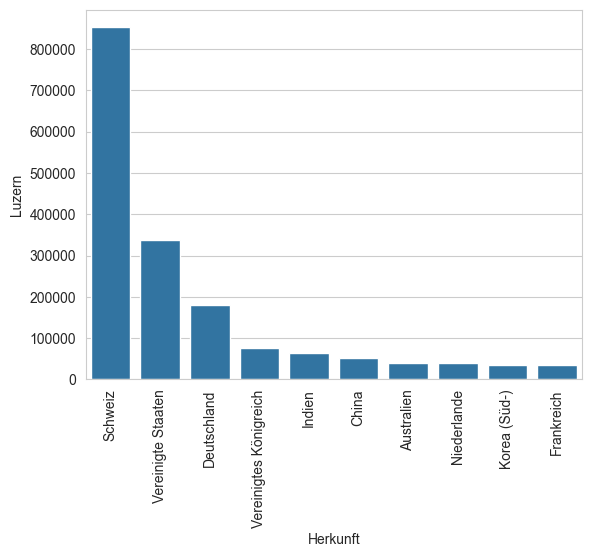

In [61]:
sns.barplot(temp, x='Herkunft', y='Luzern')
plt.xticks(rotation=90)
plt.show()

Ich nehme an, viele nicht in Luzern übernachten sondern nur besuchen.

## Aufgabe 2 (25 Punkte)

Du arbeitest als Data Scientist neu bei einem Startup, das sich darauf spezialisieren möchte, die Erfolgsquote von Gebirgstouren mit Hilfe von Data Science und Machine Learning zu verbessern. Als Einarbeitungschallenge sollst du herausfinden, welches Wissen aus einem Datenset aus Himalaya-Expeditionen gezogen werden kann. Dieses Datenset ist hierarchisch organisiert: Auf der obersten Stufe sind die Gipfel (peaks). Zu jedem Peak wurde eine Reihe von Expeditionen gestartet, je nachdem mit oder ohne Erfolg. Jede Expedition besteht wiederum aus einer Reihe von Mitgliedern. Auf allen drei Hierarchiestufen wurden Daten gesammelt, zum Beispiel die Höhe des Gipfels (Stufe 1), die Jahreszeit einer Expedition zu einem Gipfel (Stufe 2) oder das Alter eines Expeditionsmitglieds (Stufe 3).

### a) (7 Punkte)

Die ersten zwei Hierarchiestufen (Gipfel und Expeditionen) liegen dir als JSON-Datei vor. Lies die beiliegende Datei `expedition_statistics.json` in ein Data Frame ein und mache sie flach, so dass jede Expedition mit entsprechenden Peak-Daten durch eine Zeile repräsentiert ist.

**Hinweise**:
* Benutze eine geeignete Kombination aus `explode()` / `json\_normalize()` (Pandas) bzw. `unnest()` (tidyverse) um das Data Frame flach zu machen.
* Dein resultierendes Data Frame sollte aus 10'441 Zeilen bestehen, Peaks ohne Expeditionen sollten explizit im Datenset drin bleiben.

In [62]:
df = pd.read_json('expedition_statistics.json')
df_expeditions = df.explode('expeditions').reset_index()

df_normalized = pd.json_normalize(df_expeditions['expeditions'])
df_expeditions = df_expeditions.drop(columns=['expeditions', 'index'])

df = pd.concat([df_expeditions, df_normalized], axis=1)

df

,peak_id,peak_name,peak_alternative_name,height_metres,climbing_status,first_ascent_year,first_ascent_country,first_ascent_expedition_id,expedition_id,year,...,highpoint_date,termination_date,termination_reason,highpoint_metres,members,member_deaths,hired_staff,hired_staff_deaths,oxygen_used,trekking_agency
0,AMAD,Ama Dablam,Amai Dablang,6814,Climbed,1961.0,"New Zealand, USA, UK",AMAD61101,AMAD88101,1988.0,...,1988-04-10,None,"Bad conditions (deep snow, avalanching, fallin...",5770.0,4.0,0.0,2.0,0.0,False,Mountain Travel
1,AMAD,Ama Dablam,Amai Dablang,6814,Climbed,1961.0,"New Zealand, USA, UK",AMAD61101,AMAD88102,1988.0,...,1988-04-15,1988-04-17,"Bad conditions (deep snow, avalanching, fallin...",6520.0,6.0,1.0,0.0,0.0,False,Mountain Travel
2,AMAD,Ama Dablam,Amai Dablang,6814,Climbed,1961.0,"New Zealand, USA, UK",AMAD61101,AMAD88401,1988.0,...,1988-12-16,None,Success (main peak),6814.0,3.0,0.0,1.0,0.0,False,None
3,AMAD,Ama Dablam,Amai Dablang,6814,Climbed,1961.0,"New Zealand, USA, UK",AMAD61101,AMAD88402,1988.0,...,1988-12-04,1988-12-10,Success (main peak),6814.0,16.0,0.0,9.0,0.0,False,None
4,AMAD,Ama Dablam,Amai Dablang,6814,Climbed,1961.0,"New Zealand, USA, UK",AMAD61101,AMAD83301,1983.0,...,1983-10-22,None,Success (main peak),6814.0,17.0,2.0,5.0,0.0,False,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10436,JANE,Jannu East,Khumbhakarna East,7460,Unclimbed,NaN,None,None,JANE96301,1996.0,...,None,1996-10-17,Accident (death or serious injury),NaN,3.0,2.0,0.0,0.0,False,Wilderness Experience
10437,JANE,Jannu East,Khumbhakarna East,7460,Unclimbed,NaN,None,None,JANE98101,1998.0,...,1998-04-08,1998-05-07,"Bad weather (storms, high winds)",5080.0,8.0,0.0,0.0,0.0,False,Wilderness Experience
10438,JANE,Jannu East,Khumbhakarna East,7460,Unclimbed,NaN,None,None,JANE18301,2018.0,...,2018-09-19,2018-10-07,"Bad conditions (deep snow, avalanching, fallin...",4550.0,2.0,0.0,0.0,0.0,False,Expedition Himalaya
10439,JANE,Jannu East,Khumbhakarna East,7460,Unclimbed,NaN,None,None,JANE19101,2019.0,...,2019-03-28,2019-04-03,"Route technically too difficult, lack of exper...",7412.0,3.0,0.0,0.0,0.0,False,Dream Himalaya Adventures


### b) (9 Punkte)

Die Mitgliederdaten zu den einzelnen Expeditionen sind in `members.csv` zu finden. Lies die Datei ein und führe einen Join an die Expeditionsdaten aus, insbesondere mit den folgenden Schritten

1. Prüfe, ob jede Expeditions-ID nur jeweils einer Peak-ID zugewiesen ist, d.h. ob es ausreicht, nur sie als Join-Kriterium zu verwenden.
2. Entferne alle Variablen auf Peak- oder Expeditionslevel (`peak_id`, `year`, ..) aus den Mitgliederdaten, so dass durch den Join keine Duplikate von Spalten entstehen, die gleich sind, aber keine Join-Kriterien waren (Verwendung als Join-Kriterien wegen fehlender Werte schwierig).
3. Benenne die Spalte '`oxygen_used`' auf Mitglieder-Level in '`member_oxygen_used`' um.
4. Verwende einen Left-Join, um den Verlust von allfälligen Expeditionen ohne Mitgliederdaten zu vermeiden.
5. Gib zum Schluss die Anzahl Zeilen des resultierenden Data Frames aus.

In [63]:
members = pd.read_csv('members.csv')
members

,expedition_id,member_id,peak_id,peak_name,year,season,sex,age,citizenship,expedition_role,...,highpoint_metres,success,solo,oxygen_used,died,death_cause,death_height_metres,injured,injury_type,injury_height_metres
0,AMAD78301,AMAD78301-01,AMAD,Ama Dablam,1978,Autumn,M,40.0,France,Leader,...,NaN,False,False,False,False,NaN,NaN,False,NaN,NaN
1,AMAD78301,AMAD78301-02,AMAD,Ama Dablam,1978,Autumn,M,41.0,France,Deputy Leader,...,6000.0,False,False,False,False,NaN,NaN,False,NaN,NaN
2,AMAD78301,AMAD78301-03,AMAD,Ama Dablam,1978,Autumn,M,27.0,France,Climber,...,NaN,False,False,False,False,NaN,NaN,False,NaN,NaN
3,AMAD78301,AMAD78301-04,AMAD,Ama Dablam,1978,Autumn,M,40.0,France,Exp Doctor,...,6000.0,False,False,False,False,NaN,NaN,False,NaN,NaN
4,AMAD78301,AMAD78301-05,AMAD,Ama Dablam,1978,Autumn,M,34.0,France,Climber,...,NaN,False,False,False,False,NaN,NaN,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76514,PUTH19101,PUTH19101-07,PUTH,Putha Hiunchuli,2019,Spring,M,44.0,Nepal,H-A Worker,...,6350.0,False,False,False,False,NaN,NaN,False,NaN,NaN
76515,RATC19101,RATC19101-01,RATC,Ratna Chuli,2019,Spring,M,55.0,Romania,Leader,...,6600.0,False,False,False,False,NaN,NaN,False,NaN,NaN
76516,SANK19101,SANK19101-01,SANK,Sano Kailash,2019,Spring,M,56.0,Austria,Leader,...,6452.0,True,False,False,False,NaN,NaN,False,NaN,NaN
76517,SANK19101,SANK19101-02,SANK,Sano Kailash,2019,Spring,F,57.0,Austria,Climber,...,5700.0,False,False,False,False,NaN,NaN,False,NaN,NaN


In [64]:
false_combinations = members[members['peak_id'].astype(str) != members['expedition_id'].astype(str).str[:4]]
false_combinations

,expedition_id,member_id,peak_id,peak_name,year,season,sex,age,citizenship,expedition_role,...,highpoint_metres,success,solo,oxygen_used,died,death_cause,death_height_metres,injured,injury_type,injury_height_metres


In [65]:
members = members.drop(columns=['highpoint_metres', 'season', 'year', 'peak_name', 'peak_id'])

In [66]:
members = members.rename(columns={'oxygen_used':'member_oxygen_used'})
members

,expedition_id,member_id,sex,age,citizenship,expedition_role,hired,success,solo,member_oxygen_used,died,death_cause,death_height_metres,injured,injury_type,injury_height_metres
0,AMAD78301,AMAD78301-01,M,40.0,France,Leader,False,False,False,False,False,NaN,NaN,False,NaN,NaN
1,AMAD78301,AMAD78301-02,M,41.0,France,Deputy Leader,False,False,False,False,False,NaN,NaN,False,NaN,NaN
2,AMAD78301,AMAD78301-03,M,27.0,France,Climber,False,False,False,False,False,NaN,NaN,False,NaN,NaN
3,AMAD78301,AMAD78301-04,M,40.0,France,Exp Doctor,False,False,False,False,False,NaN,NaN,False,NaN,NaN
4,AMAD78301,AMAD78301-05,M,34.0,France,Climber,False,False,False,False,False,NaN,NaN,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76514,PUTH19101,PUTH19101-07,M,44.0,Nepal,H-A Worker,True,False,False,False,False,NaN,NaN,False,NaN,NaN
76515,RATC19101,RATC19101-01,M,55.0,Romania,Leader,False,False,False,False,False,NaN,NaN,False,NaN,NaN
76516,SANK19101,SANK19101-01,M,56.0,Austria,Leader,False,True,False,False,False,NaN,NaN,False,NaN,NaN
76517,SANK19101,SANK19101-02,F,57.0,Austria,Climber,False,False,False,False,False,NaN,NaN,False,NaN,NaN


In [67]:
df = df.set_index('expedition_id')
members = members.set_index('expedition_id')

In [68]:
df = df.join(members, on='expedition_id', how='left')
df

,peak_id,peak_name,peak_alternative_name,height_metres,climbing_status,first_ascent_year,first_ascent_country,first_ascent_expedition_id,year,season,...,hired,success,solo,member_oxygen_used,died,death_cause,death_height_metres,injured,injury_type,injury_height_metres
expedition_id,,,,,,,,,,,,,,,,,,,,,
AMAD88101,AMAD,Ama Dablam,Amai Dablang,6814,Climbed,1961.0,"New Zealand, USA, UK",AMAD61101,1988.0,Spring,...,False,False,False,False,False,NaN,NaN,False,NaN,NaN
AMAD88101,AMAD,Ama Dablam,Amai Dablang,6814,Climbed,1961.0,"New Zealand, USA, UK",AMAD61101,1988.0,Spring,...,False,False,False,False,False,NaN,NaN,True,AMS,NaN
AMAD88101,AMAD,Ama Dablam,Amai Dablang,6814,Climbed,1961.0,"New Zealand, USA, UK",AMAD61101,1988.0,Spring,...,False,False,False,False,False,NaN,NaN,True,Falling rock / ice,NaN
AMAD88101,AMAD,Ama Dablam,Amai Dablang,6814,Climbed,1961.0,"New Zealand, USA, UK",AMAD61101,1988.0,Spring,...,False,False,False,False,False,NaN,NaN,False,NaN,NaN
AMAD88102,AMAD,Ama Dablam,Amai Dablang,6814,Climbed,1961.0,"New Zealand, USA, UK",AMAD61101,1988.0,Spring,...,False,False,False,False,False,NaN,NaN,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
JANE18301,JANE,Jannu East,Khumbhakarna East,7460,Unclimbed,NaN,None,None,2018.0,Autumn,...,False,False,False,False,False,NaN,NaN,False,NaN,NaN
JANE19101,JANE,Jannu East,Khumbhakarna East,7460,Unclimbed,NaN,None,None,2019.0,Spring,...,False,False,False,False,False,NaN,NaN,False,NaN,NaN
JANE19101,JANE,Jannu East,Khumbhakarna East,7460,Unclimbed,NaN,None,None,2019.0,Spring,...,False,False,False,False,False,NaN,NaN,False,NaN,NaN


In [70]:
print(df.shape[0])

76602


### c) (4 Punkte)

Wie stark beeinflusst der Gebrauch von Sauerstoff (`member_oxygen_used`) den Erfolg (`success`) oder den Tod (`died`) eines Expeditionsmitglieds im Schnitt? Berechne die insgesamte Erfolgs- bzw. Todesrate mit und ohne Sauerstoff und vergleiche.

In [71]:
df.groupby(['member_oxygen_used', 'success', 'died']).size().reset_index()

,member_oxygen_used,success,died,0
0,False,False,False,42458
1,False,False,True,762
2,False,True,False,14919
3,False,True,True,137
4,True,False,False,3996
5,True,False,True,106
6,True,True,False,14032
7,True,True,True,101


### d) (5 Punkte)

Du möchtest eine Statistik erstellen, wo du die durchschnittliche Erfolgsrate pro Gipfel angibst. Gehe dazu folgendermassen vor:

1. Erzeuge eine Variable '`expedition_success_rate`' auf Expeditionslevel, die die Mitglieder-Erfolgsrate (`success`) pro Expedition angibt.
2. Berechne für jeden Peak die durchschnittliche Expeditionserfolgsrate und visualisiere die resultierende Verteilung in einem Histogramm.

In [ ]:
# DEIN CODE